# Tutorial for Denoising Auto-Encoder using Keras
https://blog.keras.io/building-autoencoders-in-keras.html

In [2]:
# model building libs
from keras.layers import Input, Dense
from keras.models import Model

# dataset
from keras.datasets import mnist

# other libs
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
# prepare data
# mnist - by default int8 28x28
(x_train,_), (x_test,_) = mnist.load_data()

# normalize and flatten
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
# prepare model
input_img = Input(shape=(784,))
encoder = Dense(32, activation='relu')(input_img)
decoder = Dense(784, activation='sigmoid')(encoder)
autoencoder = Model(input_img, decoder)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.3615 - val_loss: 0.2700
Epoch 2/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.2612 - val_loss: 0.2485
Epoch 3/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.2372 - val_loss: 0.2247
Epoch 4/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.2175 - val_loss: 0.2083
Epoch 5/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.2036 - val_loss: 0.1965
Epoch 6/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.1932 - val_loss: 0.1874
Epoch 7/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.1852 - val_loss: 0.1804
Epoch 8/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.1789 - val_loss: 0.1747
Epoch 9/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.1737 - val_loss: 0.1701
Epoch

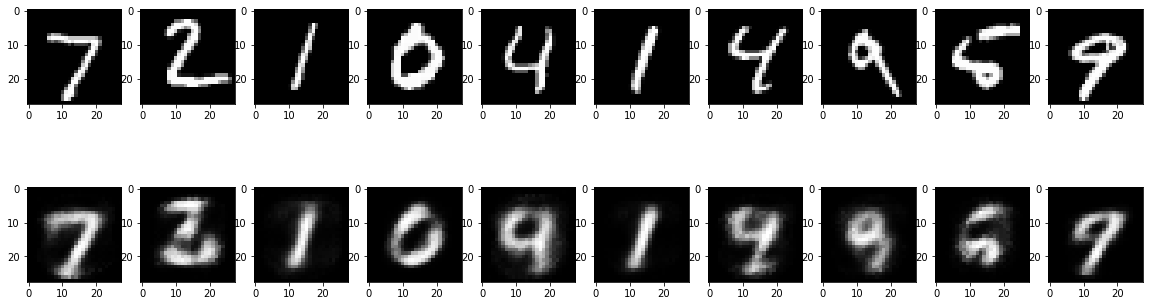

In [5]:
# train and test
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

x_test_predicted = autoencoder.predict(x_test)

n=10
plt.figure(figsize=(20,6))
for i in range(n):
  #original
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()

  #reconstructed
  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(x_test_predicted[i].reshape(28,28))
  plt.gray()

# Denoising image

In [6]:
# prepare data
# add noise
# mnist - by default int8 28x28
(x_train,_), (x_test,_) = mnist.load_data()

# normalize and flatten
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

noise_factor = 0.5
x_train_noise = x_train + noise_factor*np.random.normal(loc=0, scale=1.0, size=x_train.shape)
x_test_noise  = x_test + noise_factor*np.random.normal(loc=0, scale=1.0, size=x_test.shape)

In [7]:
# prepare model
input_img = Input(shape=(784,))
encoder = Dense(32, activation='relu')(input_img)
decoder = Dense(784, activation='sigmoid')(encoder)
autoencoder = Model(input_img, decoder)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.3531 - val_loss: 0.2730
Epoch 2/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.2666 - val_loss: 0.2575
Epoch 3/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.2490 - val_loss: 0.2383
Epoch 4/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.2303 - val_loss: 0.2203
Epoch 5/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.2155 - val_loss: 0.2085
Epoch 6/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.2055 - val_loss: 0.2002
Epoch 7/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.1979 - val_loss: 0.1932
Epoch 8/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.1918 - val_loss: 0.1876
Epoch 9/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.1865 - val_loss: 0.1829
Epoch

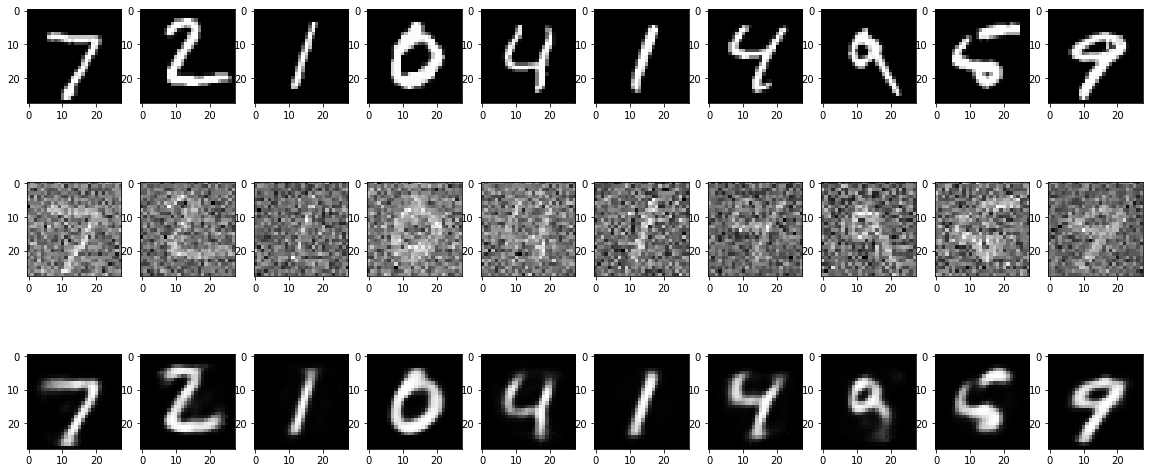

In [8]:
# train and test
autoencoder.fit(x_train_noise, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noise, x_test))

x_test_predicted = autoencoder.predict(x_test)

n=10
plt.figure(figsize=(20,9))
for i in range(n):
  #original
  plt.subplot(3,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()

  #noise
  plt.subplot(3,n,i+1+n)
  plt.imshow(x_test_noise[i].reshape(28,28))
  plt.gray()

  #reconstructed
  plt.subplot(3,n,i+1+2*n)
  plt.imshow(x_test_predicted[i].reshape(28,28))
  plt.gray()